# <center><font color='MediumSeaGreen'> _Módulo Machine Learning G45_</font>
# <center><font color='MediumSeaGreen'> Desafío evaluado - Máquinas de Soporte Vectorial </font>
## <center> _Algoritmos de clasificación (Parte II)_ 
    
### <center><b> Bárbara Pérez </b><center>
    

___

## <font color='MediumSeaGreen'>Requerimientos</font>

Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El
objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que
predica de forma adecuada en base a una serie de atributos sobre la composición del
núcleo de una célula mamaria. 

_____________

## <font color='MediumSeaGreen'>Ejercicio 1: Preparar el ambiente de trabajo</font>

* Importe todas las librerías a utilizar.
* Fije los parámetros de los gráficos con <span style='background:gainsboro'><font color='dimgray'>plt.Rcparams</font></span>.
* Excluya las columnas <span style='background:gainsboro'><font color='dimgray'>id</font></span> y <span style='background:gainsboro'><font color='dimgray'>Unnamed: <font color='Maroon'>32</font></span> de la base de datos.
- Decodifique el vector objetivo <span style='background:gainsboro'><font color='dimgray'>diagnosis</font></span> numérico para poder procesarlo posteriormente.

### Importar librerias

In [1]:
#librerías clásicas
import matplotlib.pyplot as plt #version 3.5.2
import pandas as pd  #version 1.4.3
import seaborn as sns  #version 0.11.2
import numpy as np  #version 1.23.0

#librería para análisis exploratorio
import pandas_profiling #version 3.2.0

#librería para pre procesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#librerias para modelamiento
from sklearn.model_selection import train_test_split

#librerías para las métricas
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


#eliminamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

#seteamos elementos cosméticos para los gráficos
from matplotlib.gridspec import GridSpec
sns.set_style("darkgrid")
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 20)
plt.rcParams["figure.dpi"] = 100  # resolución gráficos


In [2]:
## Otras librerias
#importamos librerias para cambiar los tamaños de visualización del Jupyter
from IPython.display import display, HTML
#mejoramos la visualización
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 85%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))
#agregamos javascript y link para mostrar/ocultar el código
HTML(
    '''
    <script>
    code_show=false; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <h4>
    Para ocultar/visualizar el código, presionar <a href="javascript:code_toggle()">AQUI</a>.</h4>
    '''
)

### Importamos funciones adicionales

In [3]:
import lec5_graphs as afx

### Importamos las data

In [4]:
#Importamos la data
df = pd.read_csv('breast_cancer.csv')

In [5]:
#inspeccionamos el df
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### - Excluya las columnas id y Unnamed: 32 de la base de datos

In [6]:
#eliminamos las columnas 'id' y 'Unnamed: 32'
df = df.drop(columns=['id','Unnamed: 32' ])

### - Decodifique el vector objetivo diagnosis numérico para poder procesarlo posteriormente.

In [7]:
#revisamos el vector objetivo
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
#recodificamoas el vector objetivo
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [9]:
#revisamos el vector objetivo
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

__________

## <font color='MediumSeaGreen'>Ejercicio 2: Visualizando la distribución de los atributos</font>

- Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo.
- Agregue las medias correspondientes y reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

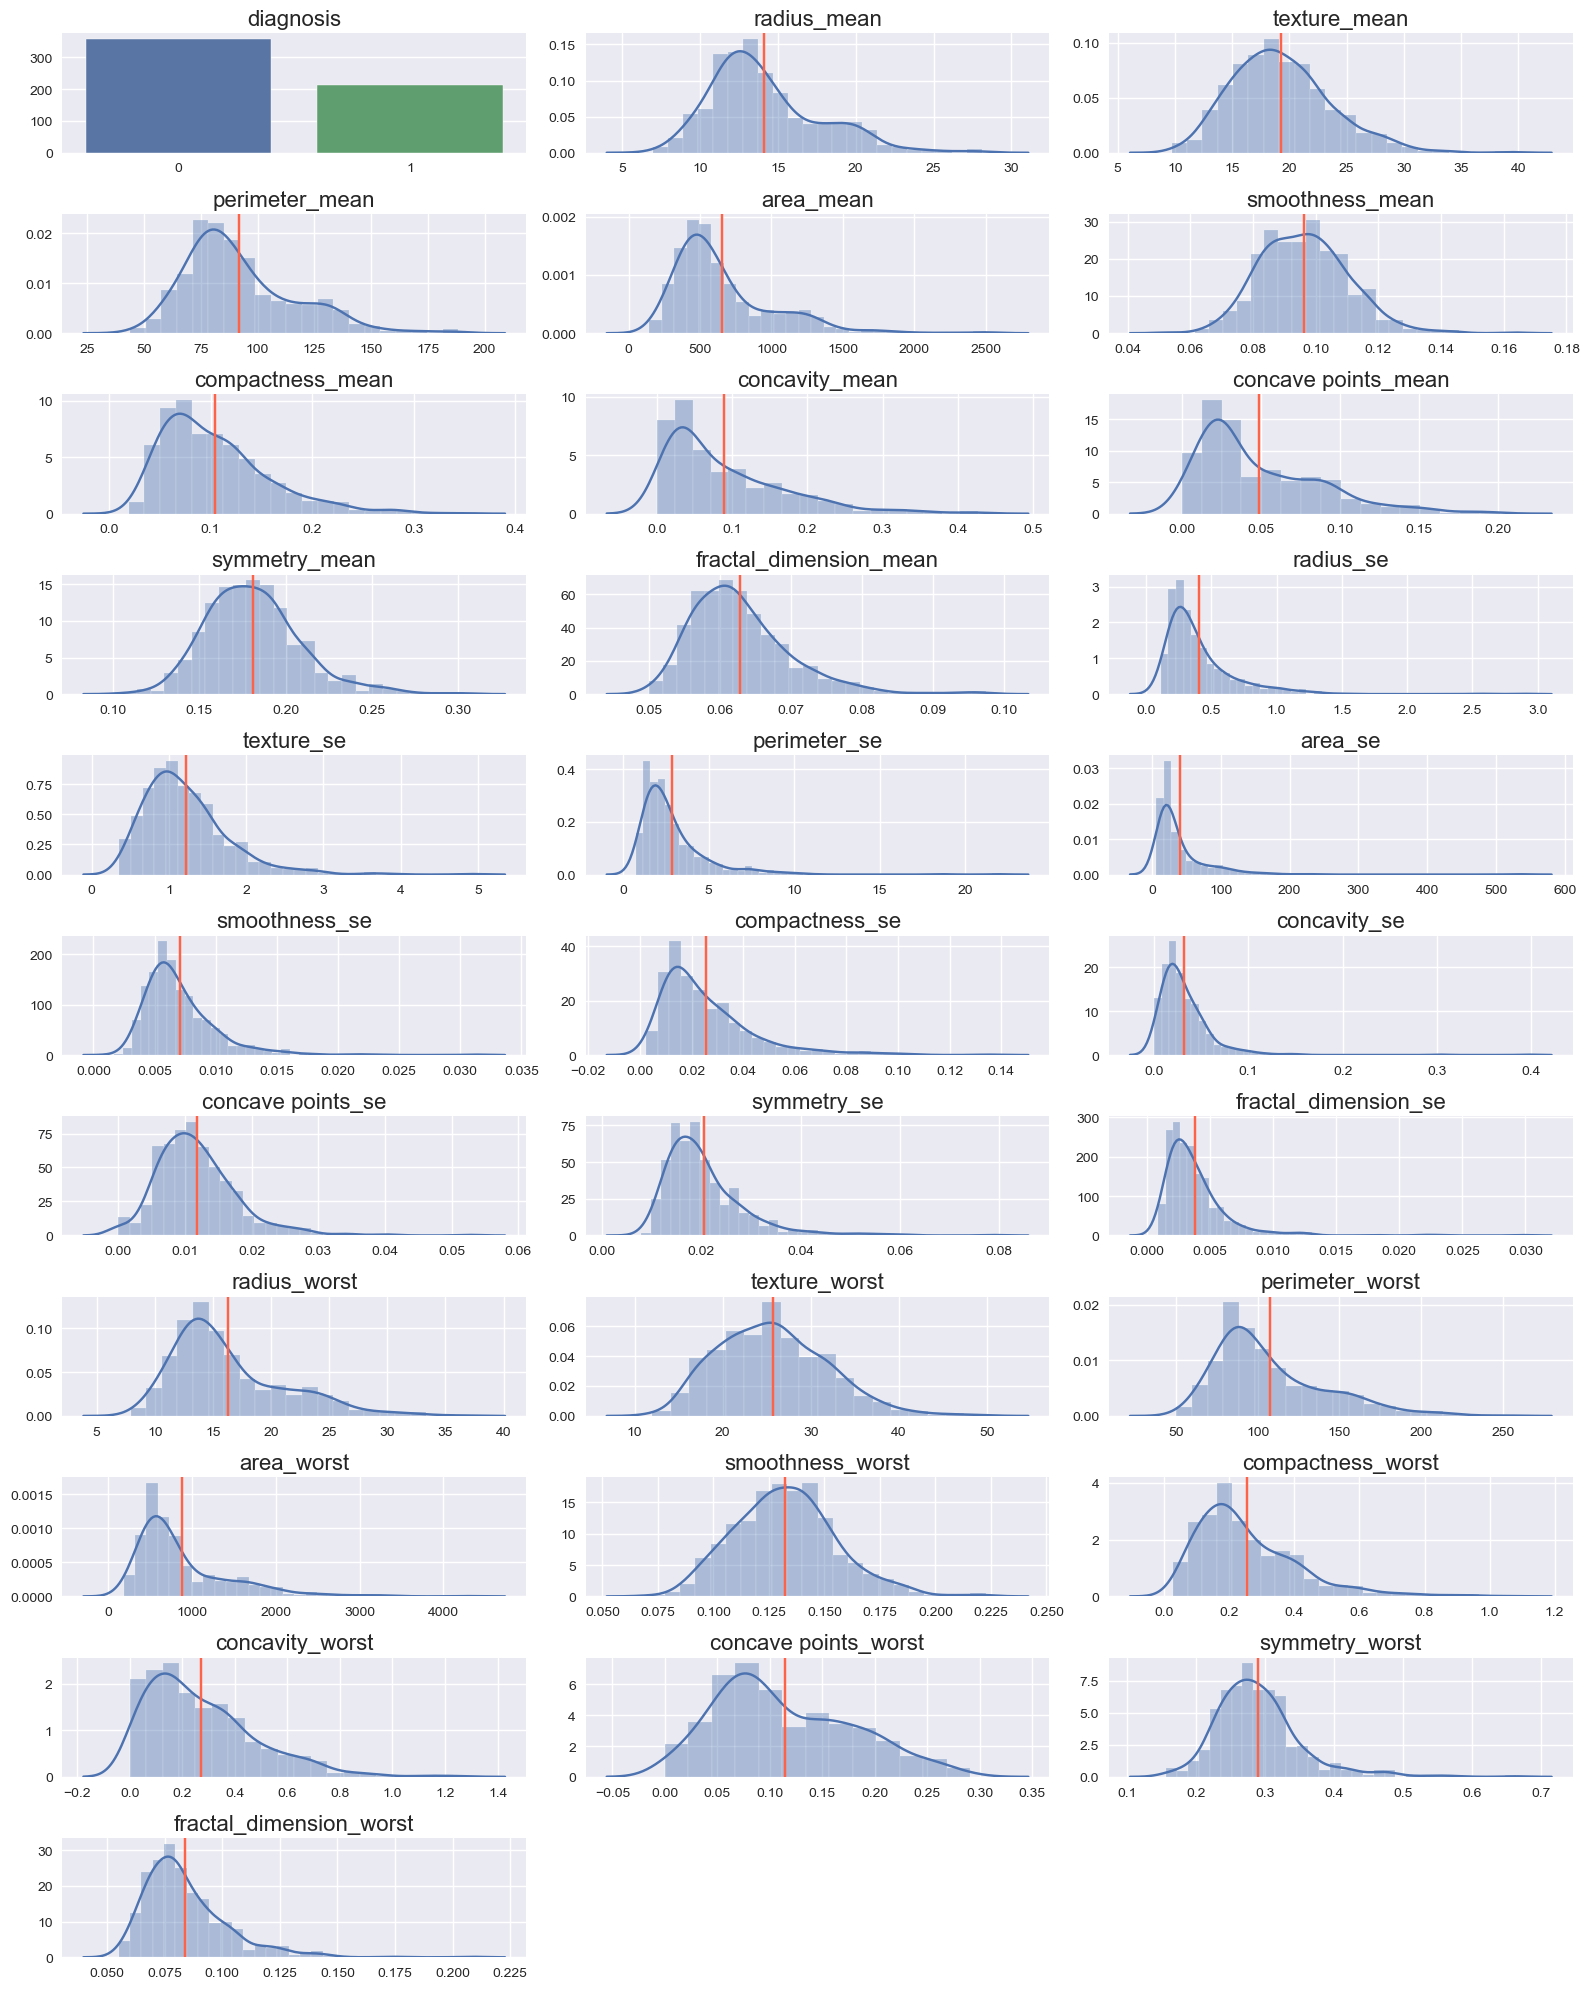

In [10]:
#graficamos histogramas por cada columna y las clases recodificadas del vector objetivo
rows = 11; cols = 3
plt.rcParams['figure.figsize']=(16, 20)
for index, (colname, serie) in enumerate(df.iteritems()):
    plt.subplot(rows, cols, index + 1)
    #histogramas para columnas numéricas
    if pd.api.types.is_float_dtype(serie) is True:
        sns.distplot(serie)    
        #agregamos las medias
        plt.axvline(np.mean(serie), color='tomato')
    #countplot para columnas categóricas
    elif pd.api.types.is_integer_dtype(serie) is True:
        sns.countplot(serie)
    plt.title(colname, fontsize=16)
    plt.xlabel('');plt.ylabel('');plt.tight_layout()
    plt.show

Los atributos con mayor similud son los siguientes:
    
- texture_mean 
- smoothness_mean 
- symmetry_mean 
- texture_worst 
- smoothness_worst
    

Los demás atributos presentan, en general, asimetria positiva (sesgo a la derecha)

_________

## <font color='MediumSeaGreen'>Ejercicio 3: Estimando el porcentaje de overlap en los atributos</font>

- Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvia es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.


- El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:

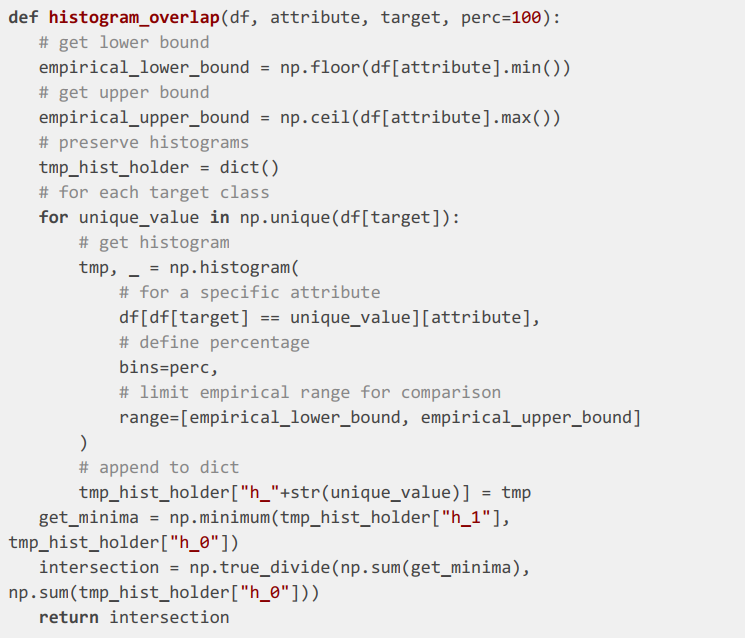

- La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.


- Utilizando la función, generará un data frame donde almacenará el nombre del atributo y su porcentaje. Ordene este data frame de forma descendente y preserve.

In [11]:
#implementamos la función del ejercicio, para estimar
#el rango de no separabilidad
def histogram_overlap(df, attribute, target, perc=100):
    # get lower bound
    empirical_lower_bound = np.floor(df[attribute].min()) # get upper bound
    empirical_upper_bound = np.ceil(df[attribute].max()) # preserve histograms
    tmp_hist_holder = dict()
    # for each target class
    for unique_value in np.unique(df[target]): # get histogram
        tmp, _ = np.histogram(
            # for a specific attribute
            df[df[target] == unique_value][attribute],
            # define percentage
            bins=perc,
            # limit empirical range for comparison 
            range=[empirical_lower_bound, empirical_upper_bound]
        )
        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp
    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder["h_0"]))
    return intersection

In [12]:
#ejecutamos la función sobre un vector
histogram_overlap(df, 'radius_mean', 'diagnosis')

0.18487394957983194

In [13]:
#crearemos un dataframe para almacenar los nombres de los atributos
#y sus porcentajes
#creamos el diccionario
diccionario = {}
#iteramos sobre los vectores almacenando los resultados en el diccionario
for i in df.drop(columns='diagnosis').columns:
    diccionario[i] = histogram_overlap(df,i,'diagnosis')
#creamos el df
df_porcentajes_atributos = pd.DataFrame({'atributo': list(diccionario.keys()), 'procentajes': list(diccionario.values())})

In [14]:
#ordenamos el df en forma descendente y lo visualizamos
df_porcentajes_atributos.sort_values(by=['procentajes'], ascending=False)

,atributo,procentajes
19,fractal_dimension_se,0.593838
14,smoothness_se,0.591036
9,fractal_dimension_mean,0.588235
18,symmetry_se,0.568627
11,texture_se,0.549020
15,compactness_se,0.523810
4,smoothness_mean,0.521008
8,symmetry_mean,0.509804
17,concave points_se,0.507003
29,fractal_dimension_worst,0.492997


_________

## <font color='MediumSeaGreen'>Ejercicio 4: Selección del modelo por GridSearchCV</font>

- Entrene una serie de modelos <span style='background:gainsboro'><font color='dimgray'>SVC</font></span> con los siguientes hiper parámetros:
    - <span style='background:gainsboro'><font color='dimgray'>C: <font color='Maroon'>[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000].</font></span>
    - <span style='background:gainsboro'><font color='dimgray'>gamma: <font color='Maroon'>[0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10].</font></span>
    - Validaciones cruzadas: 10.
    
- Genere un heatmap en base a los puntajes estimados con <span style='background:gainsboro'><font color='dimgray'>GridSearchCV</font></span>

***Tip***: *Vea cómo acceder a la llave <span style='background:gainsboro'><font color='dimgray'>mean_test_score</font></span> en el diccionario <span style='background:gainsboro'><font color='dimgray'>cv_results_</font></span>.*


### <font color='Gray'> Digresión: Un par de elementos a considerar en la implementación de **<span style='background:gainsboro'><font color='dimgray'>cv_results_GridSearchCV</font></span>**.

Si trabajamos con <span style='background:gainsboro'><font color='dimgray'>sklearn.model_selection.GridSearchCV</font></span>, tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos <span style='background:gainsboro'><font color='dimgray'>X_train</font></span> y <span style='background:gainsboro'><font color='dimgray'>y_train</font></span> a nuestro objeto instanciado y preservando <span style='background:gainsboro'><font color='dimgray'>X_test</font></span> e <span style='background:gainsboro'><font color='dimgray'>y_test</font></span> como una muestra de validación externa. Si tenemos un archivo de testing externo, se recomienda no hacer división.

* El objeto creado con <span style='background:gainsboro'><font color='dimgray'>cv_results_sklearn.model_selection.GridSearchCV</font></span> sigue la misma funcionalidad de cualquier método de estimación de <span style='background:gainsboro'><font color='dimgray'>cv_results_scikit-learn</font></span>, con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:

    * <span style='background:gainsboro'><font color='dimgray'>sklearn.model_selection.GridSearchCV.cv_results_</font></span> devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo.

    * <span style='background:gainsboro'><font color='dimgray'>split</font></span>: Indicará la métrica específica en cada validación cruzada y combinación de hiper parámetros.

    * <span style='background:gainsboro'><font color='dimgray'>time</font></span>: Indicará el tiempo de ejecución en cada modelo.

    * Por lo general trabajaremos con <span style='background:gainsboro'><font color='dimgray'>mean_test_score</font></span> y <span style='background:gainsboro'><font color='dimgray'>mean_train_score</font></span> que representa la media de CV para cada combinación de hiper parámetros.

    * <span style='background:gainsboro'><font color='dimgray'>sklearn.model_selection.GridSearchCV.best_estimator_</font></span> devuelve un modelo listo para entrenar con la mejor combinación de hiper parámetros.

    * <span style='background:gainsboro'><font color='dimgray'>sklearn.model_selection.GridSearchCV.best_score_</font></span> devuelve el desempeño promedio del modelo en el testing interno. Si es un problema de clasificación devolverá <span style='background:gainsboro'><font color='dimgray'>Accuracy</font></span>, si es un problema de regresión devolverá <span style='background:gainsboro'><font color='dimgray'>MSE</font></span>.
    

* Reporte en qué rango de cada hiper parámetro el modelo presenta un desempeño eficiente. Reporte la mejor combinación de hiper parámetros y el desempeño en la muestra de entrenamiento.

In [15]:
#separamos la data para entrenamiento y validación
X = df.drop(columns='diagnosis')
y = df['diagnosis'] # asignamos como target la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2401)

In [16]:
#importamos GridSearchCV de acuerdo a lo solicitado
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [17]:
#creamos un diccionario con los hiperparámetros del desafío
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
#instanciamos una máquina de soporte vectorial 
svc = SVC(kernel='rbf')

In [18]:
#instanciamos un pipeline con StandarScaler y GridSearch
#sobre la máquina de soporte vectorial
pipeline_svc_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('GS_svc', GridSearchCV(SVC(kernel='rbf'), params, cv=10))
     ])

In [19]:
#entrenamos el pipeline
pipeline_svc_rbf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GS_svc',
                 GridSearchCV(cv=10, estimator=SVC(),
                              param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                                100, 1000],
                                          'gamma': [1e-07, 0.0001, 0.001, 0.01,
                                                    0.1, 1, 10]}))])

In [20]:
#obtenemos la mejor combinación de hiperparámetros
pipeline_svc_rbf['GS_svc'].best_estimator_

SVC(C=10, gamma=0.01)

In [21]:
#obtenemos la matriz de resultados promedio de las diferentes combinaciones de hiperparámetros, 
#la redimensionamos para un futuro heatmap, y la mostramos
mean_test_score = pipeline_svc_rbf['GS_svc'].cv_results_['mean_test_score']
mts = mean_test_score.reshape(8,7)
mts

array([[0.64820513, 0.64820513, 0.64820513, 0.64820513, 0.64820513,
        0.64820513, 0.64820513],
       [0.64820513, 0.64820513, 0.64820513, 0.64820513, 0.64820513,
        0.64820513, 0.64820513],
       [0.64820513, 0.64820513, 0.64820513, 0.64820513, 0.64820513,
        0.64820513, 0.64820513],
       [0.64820513, 0.64820513, 0.71871795, 0.94461538, 0.92455128,
        0.64820513, 0.64820513],
       [0.64820513, 0.73121795, 0.94967949, 0.97480769, 0.96480769,
        0.64820513, 0.64820513],
       [0.64820513, 0.94967949, 0.96980769, 0.9799359 , 0.95230769,
        0.64820513, 0.64820513],
       [0.64820513, 0.96980769, 0.9774359 , 0.96487179, 0.95230769,
        0.64820513, 0.64820513],
       [0.73871795, 0.9774359 , 0.9674359 , 0.95224359, 0.95230769,
        0.64820513, 0.64820513]])

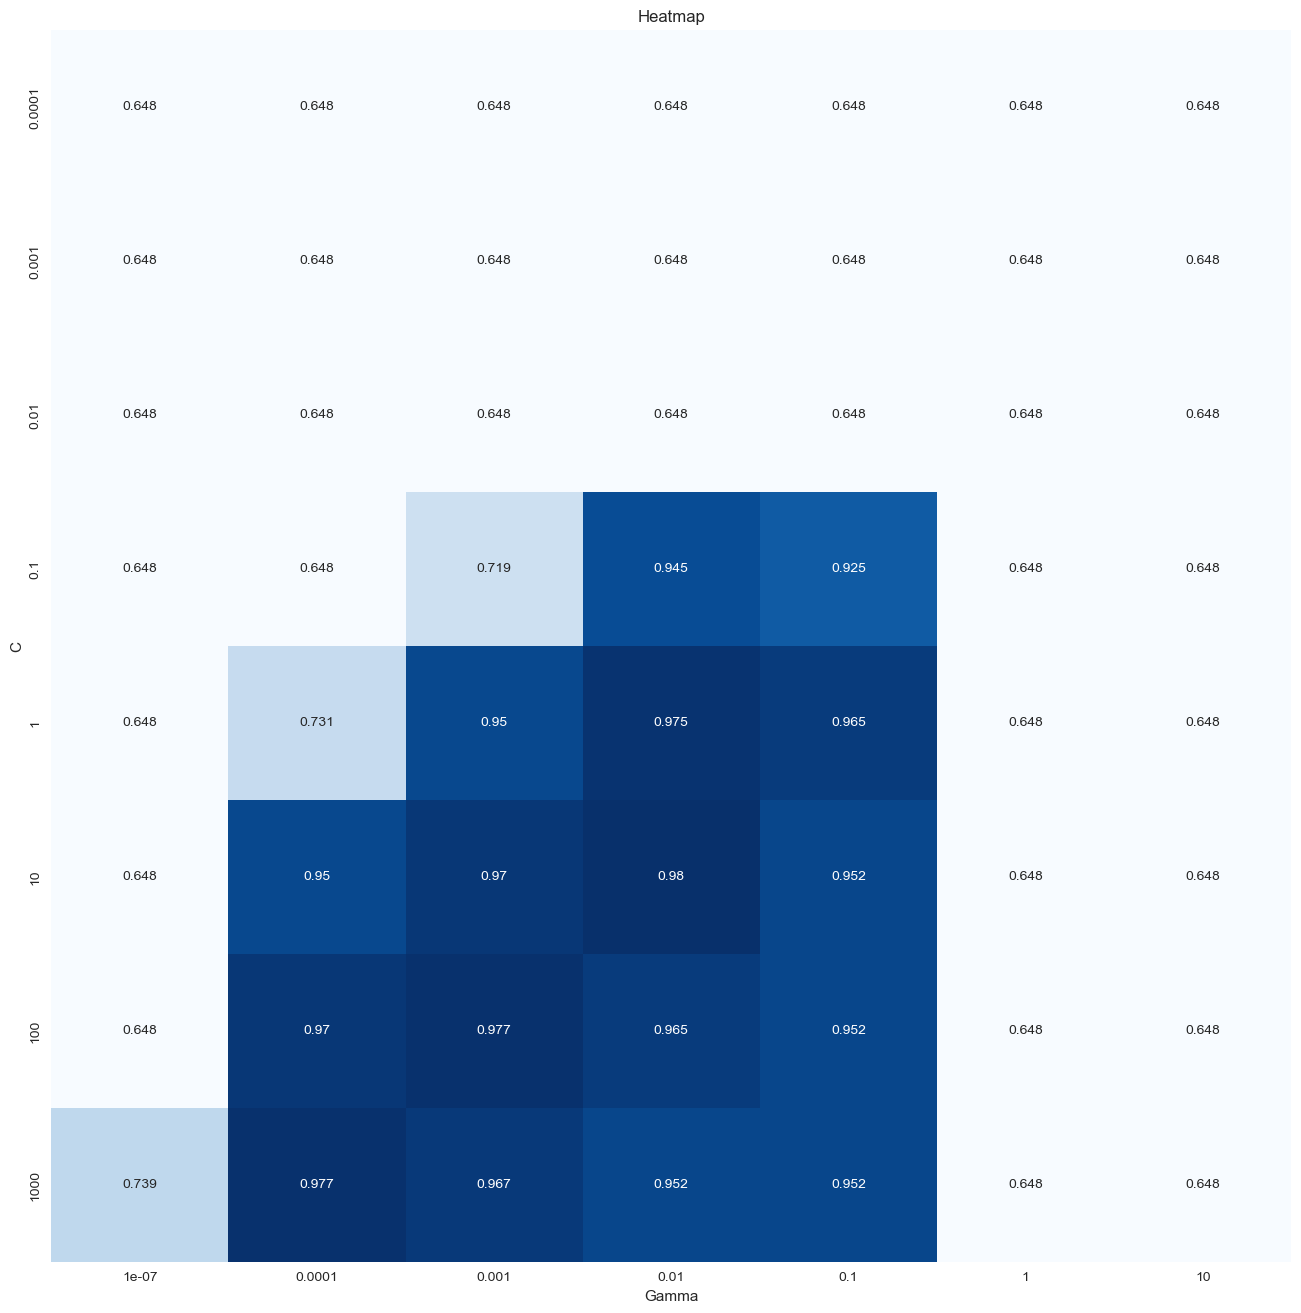

In [22]:
#ajustamos el tamaño de las imágenes
plt.rcParams['figure.figsize']=(16, 16)

#creamos el heatmap en base a la matriz de resultados promedio,  
#y los hiperparámetros del desafío, pues GridSearch sigue el mismo
#orden del diccionario de hiperparámetros que le asignamos
sns.heatmap(mts, annot=True, cmap='Blues',
    cbar=False, xticklabels=params['gamma'],
    yticklabels=params['C'], fmt=".3")
plt.xlabel('Gamma');
plt.ylabel('C');
plt.title('Heatmap');
plt.show()

Los rangos de hiperparámetros en que el modelo presenta un desempeño eficiente son:

* C [1000, 100]; 
* Gamma [0.0001, 0.001] 


La mejor combinación de hiperparámetros es :
* ***$C = 10$***

* $Gamma = 0.01$

__________

## <font color='MediumSeaGreen'>Ejercicio 5: Validación del modelo en el Test set sample </font>

* Genere las predicciones del Test set sample en base a la mejor combinación de hiper parámetros. Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. Comente en qué casos el modelo presenta un desempeño deficiente

In [23]:
#asumiendo que GirdSearch entreno el modelo con la mejor combinación de 
#hiperparámetros, creamos el vector con las predicciones
y_hat = pipeline_svc_rbf.predict(X_test)

In [24]:
#mostramos la mejor puntaje del modelo
pipeline_svc_rbf['GS_svc'].best_score_

0.9799358974358974

In [25]:
#reportamos las métricas clásicas del desempeño del modelo
model_1 = (classification_report(y_test, y_hat))
print(f'Metricas del modelo 1\n',model_1)

Metricas del modelo 1
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.93      0.96        72

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



Se observa un modelo con métricas bastante estables, que presenta bajos falsos positivos y bajos falsos negativos, sin embargo es un poco menos eficiente en el recall de la categoría 1, esto es, presenta mas falsos positivos en la predicción de dicha categoría 'M'. 

___________

## <font color='MediumSeaGreen'>Ejercicio (opcional): Depuración de atributos </font>

* Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.


* Reporte el desempeño del modelo y comente sobre los nuevos hiper parámetros estimados, así como su desempeño en comparación al modelo del ejercicio 5.

___________